# <b>Brazilian bees traits</b>

O dataset que escolhi foi "Brazilian bees traits", disponível em: [A dataset of multi-functional ecological traits of Brazilian bees](https://figshare.com/articles/dataset/A_dataset_of_multi_functional_ecological_traits_of_Brazilian_bees_csv/7100525/4?file=21704391).

Este é um dataset que descreve algumas características de abelhas encontradas no Brasil. 

A principal motivação para a escolha deste dataset foi meu interesse em meliponicultura e em abelhas no geral. São um dos animais que considero mais interessantes. 


- Importância ecológica: As abelhas têm um papel importante na polinização de plantas, inclusive para a produção de alimentos. Portanto, entender a distribuição e comportamento de abelhas pode ajudar a proteger plantações e ecossistemas.

- Impacto econômico: Apicultura e meliponicultura são atividades econômicas importantes. Entender distribuição e comportamento de abelhas produtoras de mel pode abrir novas oportunidades econômicas.

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Brazilian_bees_traits.csv", sep = ",")

# remoção de algumas colunas desnecessarias para as analises que pretendo fazer.

df = df.drop(columns=["Id", "Subgenus", "Specific epithet ", "Scientific name authorship", "Location of measured specimen", "New record ","Level", "Ref. "])

# originalmente, a variável "Known distribution" indica os locais (países e estados) onde a espécie de abelha em questão ocorre. Abaixo essa coluna é transformada para mostrar a quantidade de países em que a abelha ocorre.

df["Known distribution"] = df["Known distribution"].replace(regex={r'\([^)]*\)': ''})
df["Known distribution"] = df["Known distribution"].str.split(";").str.len()

df

,Family,Tribe,Genus,Body size class,ITDmeasured,Mhd,Thd,Mfd,Mcd,Known distribution,Locality,Crop pollinator,Sociality,Nest location
0,Andrenidae,Calliopsini,Acamptopoeum,small,1.8,0.29067,0.14222,0.64250,0.49146,4.0,bocaina,yes,Solitary,soil
1,Andrenidae,Calliopsini,Acamptopoeum,small,1.8,0.29067,0.14222,0.64250,0.49146,4.0,carajas,yes,Solitary,soil
2,Andrenidae,Calliopsini,Acamptopoeum,small,1.8,0.29067,0.14222,0.64250,0.49146,4.0,nova lima,yes,Solitary,soil
3,Apidae,Ericrocidini,Acanthopus,large,5.1,10.43954,4.47654,7.52679,9.54346,3.0,carajas,no,Cleptoparasitic,soil
4,Halictidae,Halictini,Agapostemon,medium,2.2,0.61602,0.29318,1.07652,0.91553,3.0,nova lima,no,Solitary,soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Apidae,Xylocopini,Xylocopa,large,4.7,8.04431,3.48273,6.29257,7.69042,17.0,nova lima,yes,Solitary,cavity
434,Apidae,Xylocopini,Xylocopa,large,4.7,8.04431,3.48273,6.29257,7.69042,17.0,canaa dos carajas,yes,Solitary,cavity
435,Apidae,Xylocopini,Xylocopa,large,4.8,8.27609,3.57933,6.41660,7.87351,5.0,nova lima,no,Solitary,cavity
436,Apidae,Xylocopini,Xylocopa,large,4.5,6.74842,2.94065,5.57707,6.64910,12.0,canaa dos carajas,no,Solitary,cavity


# <b>Lista de variáveis e seus tipos</b>

<table>
<thead>
  <tr>
    <th>Nome da variável</th>
    <th>Tipo de variável</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Family</td>
    <td>categórico nominal</td>
  </tr>
  <tr>
    <td>Tribe</td>
    <td>categórico nominal</td>
  </tr>
  <tr>
    <td>Genes</td>
    <td>categórico nominal</td>
  </tr>
  <tr>
    <td>Body size class</td>
    <td>categórico ordinal</td>
  </tr>
  <tr>
    <td>ITDmeasured</td>
    <td>qualitativo contínuo</td>
  </tr>
  <tr>
    <td>Mhd</td>
    <td>qualitativo contínuo</td>
  </tr>
  <tr>
    <td>Mfd</td>
    <td>qualitativo contínuo</td>
  </tr>
  <tr>
    <td>Mcd</td>
    <td>qualitativo contínuo</td>
  </tr>
  <tr>
    <td>Known distribution</td>
    <td>qualitativo discreto*</td>
  </tr>
  <tr>
    <td>Locality</td>
    <td>categórico nominal</td>
  </tr>
  <tr>
    <td>Crop pollinator</td>
    <td>categórico nominal</td>
  </tr>
  <tr>
    <td>Sociality</td>
    <td>categórico nominal</td>
  </tr>
</tbody>
</table>

\*A variável "Known distribution" originalmente é do tipo categórico nominal, e mostrava os países e estados onde existe a ocorrência da espécie de abelha. Como explicado, essa váriavel foi transformada para mostrar a *quantidade* de países onde ocorre a espécie de abelha em questão.

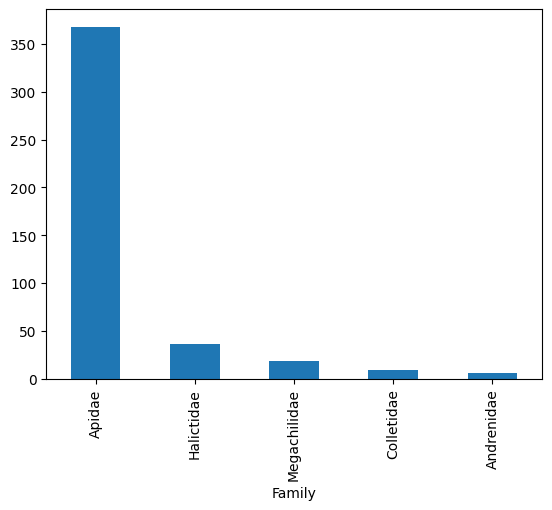

In [184]:
df["Family"].value_counts().plot(kind="bar")
plt.show()

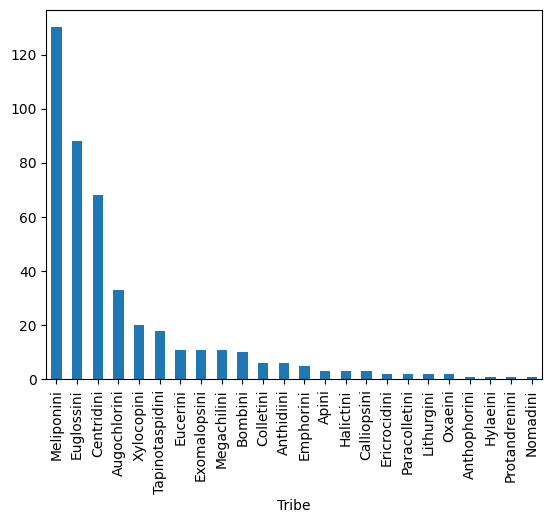

In [237]:
p = df["Tribe"].value_counts().plot(kind="bar")

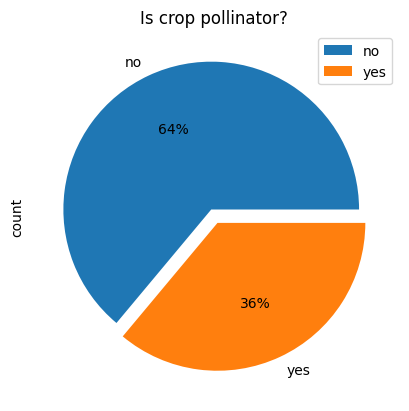

In [186]:
is_pollinator_chart = df["Crop pollinator "].value_counts().plot(kind= 'pie',autopct="%1.0f%%", title="Is crop pollinator?", explode=(0.05, 0.05))
is_pollinator_chart = is_pollinator_chart.legend(bbox_to_anchor=(1, 1))

In [83]:

nest_locality_chart = df.groupby("Nest location")

counts = nest_locality_chart["Nest location"].value_counts()

counts = counts.unstack()

counts.plot(kind="bar")

plt.show()

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

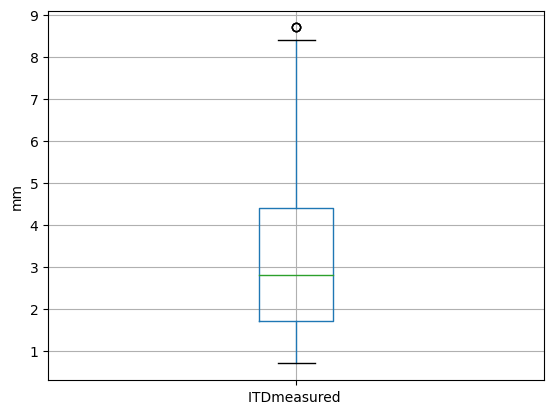

In [188]:
ITDmeasured_boxplot = df.boxplot(column = "ITDmeasured ")
ITDmeasured_boxplot.set_title("")
ITDmeasured_boxplot.set_ylabel('mm')

plt.show()

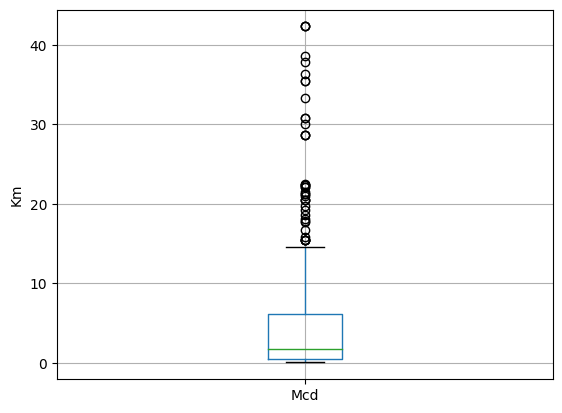

In [189]:
Mhd_boxplot = df.boxplot(column = "Mcd")
Mhd_boxplot.set_title("")
Mhd_boxplot.set_ylabel('Km')

plt.show()

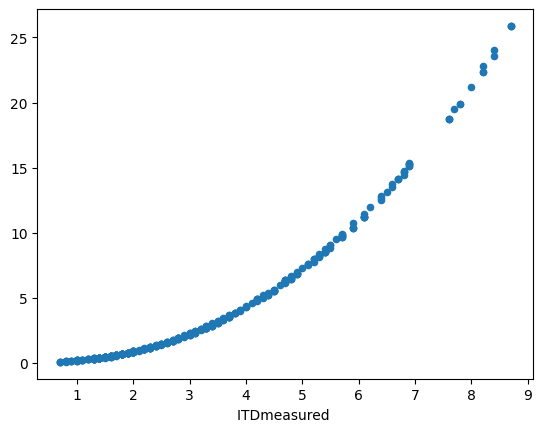

In [207]:
df.plot(
   x=4, 
   y=7, 
   kind='scatter'
).set_ylabel("")

plt.show()

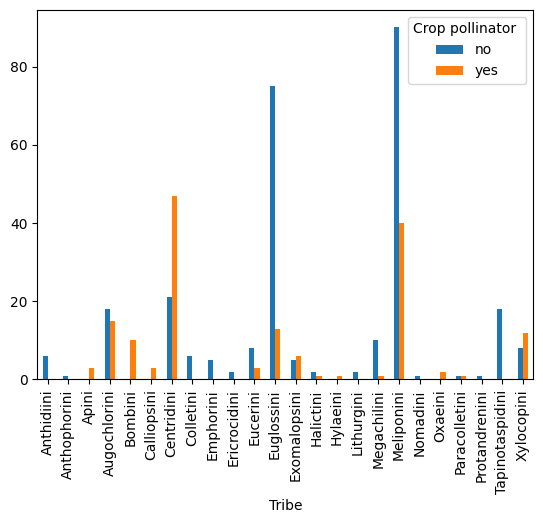

In [191]:
grouped = df.groupby("Tribe")

counts = grouped["Crop pollinator "].value_counts()

counts = counts.unstack()

counts.plot(kind="bar")
plt.show()